In [1]:
# default_exp data

# Data

> Save captured hyperspectral datacubes into NetCDF format together with metadata.

In [1]:
#hide

# documentation extraction for class methods
from nbdev.showdoc import *

# unit tests using test_eq(...)
from fastcore.test import *

# monkey patching class methods using @patch
from fastcore.foundation import *
from fastcore.foundation import patch

# imitation of Julia's multiple dispatch using @typedispatch
from fastcore.dispatch import typedispatch

In [2]:
#export 

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime



/Users/eway/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
from openhsi.capture import *
from openhsi.utils import *

## Metadata

In [4]:
openhsi_settings = settings_load("calibration_files/settings.txt")


In [5]:

metadata = {
    "Conventions":"CF-1.6",
    "Metadata_Conventions":"Unidata Dataset Deiscovery v1.0",
    "data_type":"Grid",
    "comment":"Spectra taken by a drone",
    "contact":"yiwei.mao@sydney.edu.au",
    "creator_email":"yiwei.mao@sydney.edu.au",
    "creator_name":"CUAVA Hyperspectral Team",
    "creator_url":"openhsi.github.io/openhsi/",
    "date_created":f"{datetime.datetime.now()}",
    "date_issued":f"{datetime.datetime.now()}",
    "date_modified":f"{datetime.datetime.now()}",
    "geospatial_lat_max":"-33.87",
    "geospatial_lat_min":"-33.87",
    "geospatial_lat_resolution":"0.0",
    "geospatial_lat_units":"degrees_north",
    "geospatial_long_max":"151.21",
    "geospatial_long_min":"151.21",
    "geospatial_long_resolution":"0.0",
    "geospatial_long_units":"degrees_east",
    "geospatial_vertical_max":"0.0",
    "geospatial_vertical_min":"0.0",
    "geospatial_vertical_positive":"down",
    "geospatial_vertical_resolution":"point", #?
    "geospatial_vertical_units":"m",
    "history":f"{datetime.datetime.now()} Created",
    "institution":"University of Sydney",
    "keywords":"Littoral Topography > Spectra",
    "keywords_vocabulary":"NetCDF COARDS Climate and Forecast Standard Names",
    "license":"Creative Commons Attribution 3.0 Australia License",
    "platform":"Matrice600",
    "processing_level":"L1",
    "product_version":"0.0.1",
    "project":"CUAVA Hyperspectral Project",
    "references":"https://www.cuava.com.au/",
    "source":"Hyperspectral measurements",
    "standard_name_vocabulary":"NetCDF Climate and Forecast (CF) Metadata Convention Standard Name Table v37",
    "summary":"Hyperspectral imagery collected over Jervis bay",
    "time_coverage_duration":"P1D",
    "time_coverage_end":f"{datetime.datetime.now()}",
    "time_coverage_resolution":"P1D",
    "time_coverage_start":f"{datetime.datetime.now()}",
    "title":"Suitable title"
}

openhsi_settings["metadata"] = metadata

settings_dump("calibration_files/settings.txt",openhsi_settings)

In [6]:
n = 100 # camera to take n lines

processed_data = DataCube(openhsi_settings["resolution"],openhsi_settings["row_slice"],
                          n_lines=n,axis=1,shifts=openhsi_settings["smile_shifts"],
                          wavelength_range=openhsi_settings["index2wavelength_range"][:2],
                          fwhm_nm=openhsi_settings["fwhm_nm"])
"""
with OpenHSI(xbinwidth=896,xbinoffset=528,exposure_ms=100,gain=0) as cam:
        img = cam.get_img(n,show=False)
        #processed_data.push(img) # DataCube and OpenHSI classes not integrated together yet. Can push n times though
"""
wavelengths = processed_data.wavelengths
nc_data = xr.Dataset(data_vars=dict(datacube=(["x","y","wavelength"],processed_data.data)),
                    coords=dict(
                        x=(["x"],np.arange(processed_data.size[0])),
                        y=(["y"],np.arange(processed_data.size[1])),
                        wavelength=(["wavelength"],wavelengths),
                    ),
                    attrs=openhsi_settings["metadata"])

nc_data.x.attrs["long_name"]   = "cross-track"
nc_data.x.attrs["units"]       = "pixels"
nc_data.x.attrs["description"] = "cross-track spatial coordinates"
nc_data.y.attrs["long_name"]   = "along-track"
nc_data.y.attrs["units"]       = "pixels"
nc_data.y.attrs["description"] = "along-track spatial coordinates"

nc_data.wavelength.attrs["long_name"]   = "wavelength_nm"
nc_data.wavelength.attrs["units"]       = "nanometers"
nc_data.wavelength.attrs["description"] = "wavelength in nanometers."

nc_data.datacube.attrs["long_name"]   = "hyperspectral datacube"
nc_data.datacube.attrs["units"]       = "spaxels"
nc_data.datacube.attrs["description"] = "hyperspectral datacube"

nc_data

<xarray.Dataset>
Dimensions:     (u: 450, v: 100, wavelength: 292)
Coordinates:
    x           (u) int64 0 1 2 3 4 5 6 7 8 ... 442 443 444 445 446 447 448 449
    y           (v) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * wavelength  (wavelength) float32 396.5 398.0 399.5 ... 821.9 823.4 824.8
Dimensions without coordinates: u, v
Data variables:
    datacube    (u, v, wavelength) uint16 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Deiscovery v1.0
    data_type:                       Grid
    comment:                         Spectra taken by a drone
    contact:                         yiwei.mao@sydney.edu.au
    creator_email:                   yiwei.mao@sydney.edu.au
    creator_name:                    CUAVA Hyperspectral Team
    creator_url:                     openhsi.github.io/openhsi/
    date_created:                    2021-04-01 12:13:18.372769
    date_issued:                     2021-04-01 12:13:18.372800
    date_modified:                   2021-04-01 12:13:18.372804
    geospatial_lat_max:              -33.87
    geospatial_lat_min:              -33.87
    geospatial_lat_resolution:       0.0
    geospatial_lat_units:            degrees_north
    geospatial_long_max:             151.21
    geospatial_long_min:             151.21
    geospatial_long_resolution:      0.0
    geospatial_long_units:           degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2021-04-01 12:13:18.372808 Created
    institution:                     University of Sydney
    keywords:                        Littoral Topography > Spectra
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         Creative Commons Attribution 3.0 Austral...
    platform:                        Matrice600
    processing_level:                L1
    product_version:                 0.0.1
    project:                         CUAVA Hyperspectral Project
    references:                      https://www.cuava.com.au/
    source:                          Hyperspectral measurements
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         Hyperspectral imagery collected over Jer...
    time_coverage_duration:          P1D
    time_coverage_end:               2021-04-01 12:13:18.372812
    time_coverage_resolution:        P1D
    time_coverage_start:             2021-04-01 12:13:18.372816
    title:                           Suitable title

In [7]:
for i in range(n):
    processed_data.push( np.random.randint(0,2,openhsi_settings["resolution"],dtype=np.uint16) )

nc_data.update( dict(datacube=(["x","y","wavelength"],processed_data.data)) )
nc_data.datacube.attrs["long_name"] = "hyperspectral datacube"
nc_data.datacube.attrs["units"] = "spaxels"
nc_data.datacube.attrs["description"] = "hyperspectral datacube"
nc_data

<xarray.Dataset>
Dimensions:     (u: 450, v: 100, wavelength: 292)
Coordinates:
    x           (u) int64 0 1 2 3 4 5 6 7 8 ... 442 443 444 445 446 447 448 449
    y           (v) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * wavelength  (wavelength) float32 396.5 398.0 399.5 ... 821.9 823.4 824.8
Dimensions without coordinates: u, v
Data variables:
    datacube    (u, v, wavelength) uint16 3 5 4 4 2 5 6 3 5 ... 1 2 3 3 2 3 5 1
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Deiscovery v1.0
    data_type:                       Grid
    comment:                         Spectra taken by a drone
    contact:                         yiwei.mao@sydney.edu.au
    creator_email:                   yiwei.mao@sydney.edu.au
    creator_name:                    CUAVA Hyperspectral Team
    creator_url:                     openhsi.github.io/openhsi/
    date_created:                    2021-04-01 12:13:18.372769
    date_issued:                     2021-04-01 12:13:18.372800
    date_modified:                   2021-04-01 12:13:18.372804
    geospatial_lat_max:              -33.87
    geospatial_lat_min:              -33.87
    geospatial_lat_resolution:       0.0
    geospatial_lat_units:            degrees_north
    geospatial_long_max:             151.21
    geospatial_long_min:             151.21
    geospatial_long_resolution:      0.0
    geospatial_long_units:           degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2021-04-01 12:13:18.372808 Created
    institution:                     University of Sydney
    keywords:                        Littoral Topography > Spectra
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         Creative Commons Attribution 3.0 Austral...
    platform:                        Matrice600
    processing_level:                L1
    product_version:                 0.0.1
    project:                         CUAVA Hyperspectral Project
    references:                      https://www.cuava.com.au/
    source:                          Hyperspectral measurements
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         Hyperspectral imagery collected over Jer...
    time_coverage_duration:          P1D
    time_coverage_end:               2021-04-01 12:13:18.372812
    time_coverage_resolution:        P1D
    time_coverage_start:             2021-04-01 12:13:18.372816
    title:                           Suitable title

## Saving the NetCDF file

In [8]:
nc_data.to_netcdf("calibration_files/zeros.nc")

In [10]:
with xr.open_dataset("calibration_files/zeros.nc") as ds:
    loaded_data = ds
loaded_data

<xarray.Dataset>
Dimensions:     (wavelength: 292, x: 450, y: 100)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 8 ... 442 443 444 445 446 447 448 449
  * y           (y) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * wavelength  (wavelength) float32 396.5 398.0 399.5 ... 821.9 823.4 824.8
Data variables:
    datacube    (x, y, wavelength) uint16 ...
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Deiscovery v1.0
    data_type:                       Grid
    comment:                         Spectra taken by a drone
    contact:                         yiwei.mao@sydney.edu.au
    creator_email:                   yiwei.mao@sydney.edu.au
    creator_name:                    CUAVA Hyperspectral Team
    creator_url:                     openhsi.github.io/openhsi/
    date_created:                    2021-02-08 00:23:00.026872
    date_issued:                     2021-02-08 00:23:00.026897
    date_modified:                   2021-02-08 00:23:00.026899
    geospatial_lat_max:              -33.87
    geospatial_lat_min:              -33.87
    geospatial_lat_resolution:       0.0
    geospatial_lat_units:            degrees_north
    geospatial_long_max:             151.21
    geospatial_long_min:             151.21
    geospatial_long_resolution:      0.0
    geospatial_long_units:           degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2021-02-08 00:23:00.026901 Created
    institution:                     University of Sydney
    keywords:                        Littoral Topography > Spectra
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         Creative Commons Attribution 3.0 Austral...
    platform:                        Matrice600
    processing_level:                L1
    product_version:                 0.0.1
    project:                         CUAVA Hyperspectral Project
    references:                      https://www.cuava.com.au/
    source:                          Hyperspectral measurements
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         Hyperspectral imagery collected over Jer...
    time_coverage_duration:          P1D
    time_coverage_end:               2021-02-08 00:23:00.026904
    time_coverage_resolution:        P1D
    time_coverage_start:             2021-02-08 00:23:00.026906
    title:                           Suitable title

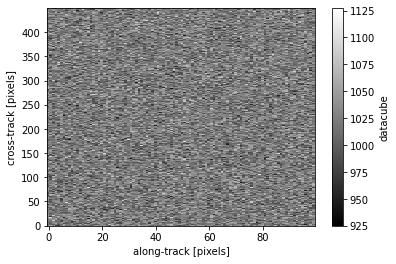

In [11]:
# plot grayscale version
loaded_data.datacube.sum(dim="wavelength").plot(cmap="gray")

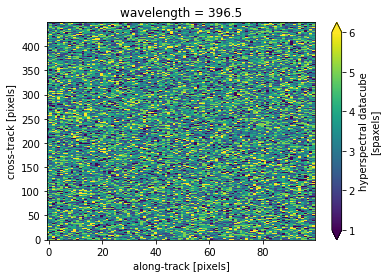

In [12]:

band0img = loaded_data.isel(wavelength=0) # selecting the first band
band0img.datacube.plot(robust=True)

## Below stuff probs not needed?

### Below stuff probs doesn't work

In [13]:
fromdisk = xr.open_dataset("../../Downloads/tmax.2013010120130101.grid.nc")
fromdisk

<xarray.Dataset>
Dimensions:       (latitude: 691, longitude: 886, time: 1)
Coordinates:
  * time          (time) datetime64[ns] 2013-01-01
  * latitude      (latitude) float32 -44.5 -44.45 -44.4 ... -10.049999 -10.0
  * longitude     (longitude) float32 112.0 112.05 112.1 ... 156.15 156.2 156.25
Data variables:
    temp_max_day  (time, latitude, longitude) float32 ...
Attributes:
    acknowledgment:            The Australian Feberal Government, The Burearu...
    license:                   Copyright for any data supplied by the Bureau ...
    title:                     Interpolated Thermometer Maximum Air Temperatu...
    keywords_vocabulary:       GCMD Science Keywords, Version 6.0.0.0.0
    standard_name_vocabulary:  "CF Standard Names, v16"
    institution:               NCC Information Officer, Bureau of Meteorology...
    summary:                   Temperatures are measured directly at about 75...
    cdm_data_type:             Grid
    references:                http://www.bom.gov.au/climate\nhttp://www.bom....
    keywords:                  Atmosphere, Atmospheric Temperature, Surface A...
    copyright:                 (C) Copyright Commonwealth of Australia 2013, ...
    Conventions:               CF-1.5
    id:                        climate
    naming_authority:          au.gov.bom
    history:                   BUREAU OF METEOROLOGY                         ...

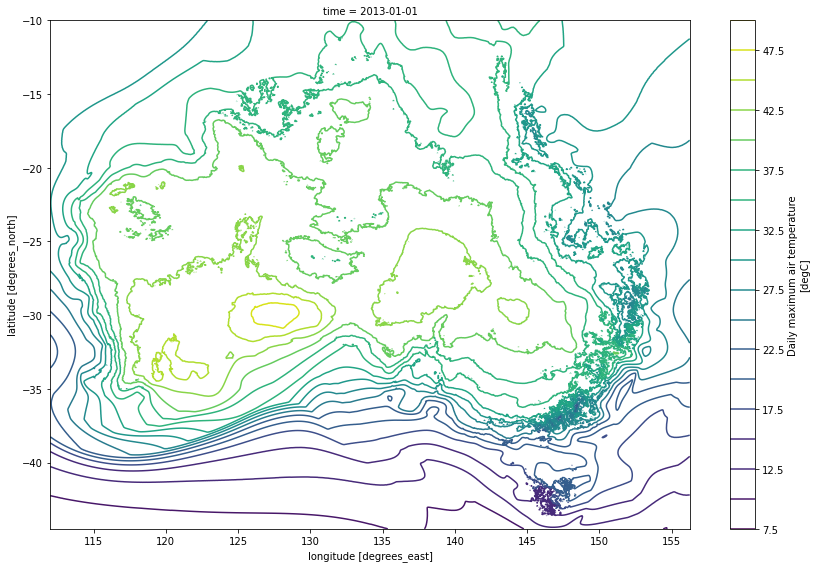

In [7]:
fromdisk.temp_max_day.plot.contour(col="time",levels=20,add_colorbar=True,figsize=(12,8))

## Old stuff not using xarray

In [2]:
#export
import h5py
from netCDF4 import Dataset

In [3]:
#export
def save(data, fname:str = 'cal_files/fname', format:str = 'nc'):
    """Could move to the capture module as a class method instead"""
    with h5py.File(fname, "w") as f:
        dset = f.create_dataset("file")
        dset[...] = data

**Perhaps this module should be integrated into the Trigger and Capture module rather than be separate...**

In [4]:
!ncdump -h ~/Downloads/tmax.2013010120130101.grid.nc 

netcdf tmax.2013010120130101.grid {
dimensions:
	time = 1 ;
	latitude = 691 ;
	longitude = 886 ;
variables:
	int time(time) ;
		time:units = "days since 1900-01-01 00:00:00.0" ;
		time:calendar = "gregorian" ;
		time:long_name = "time" ;
		time:standard_name = "time" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
		latitude:standard_name = "latitude" ;
	float longitude(longitude) ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
		longitude:standard_name = "longitude" ;
	float temp_max_day(time, latitude, longitude) ;
		temp_max_day:_FillValue = -999.f ;
		temp_max_day:units = "degC" ;
		temp_max_day:long_name = "Daily maximum air temperature" ;
		temp_max_day:standard_name = "air_temperature" ;
		temp_max_day:source = "Interpolated surface observations" ;

// global attributes:
		:acknowledgment = "The Australian Feberal Government, The Burearu of Meteorology, The Australian Water Availability Project, 

In [3]:
!ncdump -h test.ncdf4

netcdf test {
dimensions:
	time = UNLIMITED ; // (0 currently)
	level = UNLIMITED ; // (0 currently)
	lat = 73 ;
	lon = 144 ;
variables:
	double time(time) ;
	int levelz(level) ;
	float lat(lat) ;
	float lon(lon) ;
	float temp(time, level, lat, lon) ;
		temp:units = "K" ;

group: forecasts {
  } // group forecasts

group: analyses {
  } // group analyses
}


In [1]:
import netCDF4

In [3]:
dir(netCDF4)

['CompoundType',
 'Dataset',
 'Dimension',
 'EnumType',
 'Group',
 'MFDataset',
 'MFTime',
 'NC_DISKLESS',
 'NC_PERSIST',
 'VLType',
 'Variable',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__has_cdf5_format__',
 '__has_nc_create_mem__',
 '__has_nc_inq_format_extended__',
 '__has_nc_inq_path__',
 '__has_nc_open_mem__',
 '__has_parallel4_support__',
 '__has_pnetcdf_support__',
 '__has_rename_grp__',
 '__hdf5libversion__',
 '__loader__',
 '__name__',
 '__netcdf4libversion__',
 '__package__',
 '__path__',
 '__pdoc__',
 '__spec__',
 '__version__',
 '_netCDF4',
 'buffer',
 'chartostring',
 'date2index',
 'date2num',
 'default_encoding',
 'default_fillvals',
 'get_chunk_cache',
 'getlibversion',
 'glob',
 'is_native_big',
 'is_native_little',
 'ma',
 'num2date',
 'numpy',
 'posixpath',
 'python3',
 'set_chunk_cache',
 'stringtoarr',
 'stringtochar',
 'sys',
 'unicode_error',
 'utils',
 'warnings',
 'weakref']

In [32]:
from netCDF4 import Dataset

rootgrp = Dataset("test.nc", "w", format="NETCDF4")
print(rootgrp.data_model)
print('_______________________________________________')

fcstgrp = rootgrp.createGroup("forecasts")
analgrp = rootgrp.createGroup("analyses")
print(rootgrp.groups)
print('_______________________________________________')

time = rootgrp.createDimension("time", None)
level = rootgrp.createDimension("level", None)
lat = rootgrp.createDimension("lat", 73)
lon = rootgrp.createDimension("lon", 144)
print(rootgrp.dimensions)
print('_______________________________________________')

for dimobj in rootgrp.dimensions.values():
    print(dimobj)
print('_______________________________________________')
    
    
    
    
times = rootgrp.createVariable("time","f8",("time",))
levels = rootgrp.createVariable("levelz","i4",("level",))
latitudes = rootgrp.createVariable("lat","f4",("lat",))
longitudes = rootgrp.createVariable("lon","f4",("lon",))

temp = rootgrp.createVariable("temp","f4",("time","level","lat","lon",))
temp.units = "K"
print(temp)
print('_______________________________________________')




print(rootgrp.variables)
print('_______________________________________________')


rootgrp.close()

NETCDF4
_______________________________________________
{'forecasts': <class 'netCDF4._netCDF4.Group'>
group /forecasts:
    dimensions(sizes): 
    variables(dimensions): 
    groups: , 'analyses': <class 'netCDF4._netCDF4.Group'>
group /analyses:
    dimensions(sizes): 
    variables(dimensions): 
    groups: }
_______________________________________________
{'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0, 'level': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'level', size = 0, 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 73, 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144}
_______________________________________________
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'level', size = 0
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 73
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144
_____

In [31]:
rootgrp.close()

In [1]:
!pwd

/Users/eway/Desktop/openhsi


In [ ]:
class RawData(object):
    
    def __init__(self,fname::str="test.nc"):
        
        self.fname = fname
        self.rootgrp = Dataset(self.fname, "w", format="NETCDF4")
        
        # GPS
        self.time_stamp  = self.rootgrp.createDimension("time", None)
        self.time_stamps = self.rootgrp.createVariable("time","f8",("time",))
        self.time_stamps.units = "s"
        self.latitude    = self.rootgrp.createDimension("lat",None)
        self.latitudes   = self.rootgrp.createVariable("lat","f8",("lat",))
        self.latitudes.units = "deg"
        self.longitude   = self.rootgrp.createDimension("long",None)
        self.longitudes  = self.rootgrp.createVariable("long","f8",("long",))
        self.longitudes.units = "deg"
        
        # IMU
        self.orientation = self.rootgrp.createDimension("orien", None)
        self.orientations = self.rootgrp.createVariable("orien","f8",("orien",))
        self.orientations.units = "rad"
        self.velocity   = self.rootgrp.createDimension("vel",None)
        self.velocities = self.rootgrp.createVariable("vel","f8",("vel",))
        self.velocities.units = "m/s"
        
        # OpenHSI
        self.hsi_frame  = self.rootgrp.createDimension("hsi_frame", None)
        self.hsi_frames = self.rootgrp.createVariable("hsi_frame","f8",("hsi_frame",))
        self.hsi_frames.units = "reflectance"
        self.metadata   = self.rootgrp.createDimension("metadata", None)
        self.metadatas  = self.rootgrp.createVariable("metadata","f8",("metadata",)) # xml file
        
        """ from Ian's code
        # resolution?
        # Set crs globally [alternative method!]
        setattr(ncds, 'time_coverage_start', str(dt.date(1970,1,1)+relativedelta(seconds=timei[0])))
        setattr(ncds, 'time_coverage_end', str(dt.date(1970,1,1)+relativedelta(seconds=timei[-1])))
        setattr(ncds, 'DOI', "To be added")
        setattr(ncds, 'id', metadata[2])
        setattr(ncds, 'title', metadata[0])
        setattr(ncds, 'citation', metadata[4])
        setattr(ncds, 'references',metadata[5])
        setattr(ncds, 'keywords', "EARTH SCIENCE > ATMOSPHERE")
        setattr(ncds, 'summary', metadata[3])
        setattr(ncds, 'publisher_name', "The University of Sydney")
        setattr(ncds, 'acknowledgment', "The creation of this data was funded by The University of Sydney.")
        setattr(ncds, 'source', 'ANUClimate_v2-0')
        setattr(ncds, 'publisher_url', "http://www.anuclimate.org.au")
        setattr(ncds, 'publisher_email', "anuclimate@gmail.com")
        setattr(ncds, 'keywords_vocabulary', "ANZSCR-FOR: http://www.abs.gov.au/ausstats/abs@.nsf/0/6BB427AB9696C225CA2574180004463E")
        setattr(ncds, 'metadata_link', "http://geonetworkrr9.nci.org.au/geonetwork/srv/eng/catalog.search#/home")
        setattr(ncds, 'metadata_uuid', metadata[7])
        setattr(ncds, 'creator_name', "Michael Hutchinson, Jennifer Kesteven, Tingbao Xu, Ian Marang, Bradley Evans")
        setattr(ncds, 'creator_email', "anuclimate@gmail.com")
        setattr(ncds, 'creator_url', "http://anuclimate.org.au")
        setattr(ncds, 'institution', "Australian National University")
        setattr(ncds, 'license', "Copyright "+str(dt.date.today().year)+" ANU. Rights owned by The Australian National University (ANU). Rights licensed subject to Attribution Licence (CC BY 4.0)  https://creativecommons.org/licenses/by/4.0/legalcode")
        setattr(ncds, 'Conventions', "ACDD-1.3")
        setattr(ncds, 'coverage_content_type', "modelResult")
        setattr(ncds, 'cdm_data_type', "grid")
        setattr(ncds, 'contact', "Bradley Evans, Senior Lecturer, The University of Sydney, School of Life and Environmental Sciences, Building C81, 1 Central Avenue, Eveleigh, NSW, 2015, bradley.evans@sydney.edu.au, http://orcid.org/0000-0001-6675-3118")
        setattr(ncds, 'history', "Reformatted to NetCDF: "+dt.date.today().isoformat())
        setattr(ncds, 'date_created', dt.date.today().isoformat())
        # Close the file
        print 'Congratulations, your netCDF file is baked! See:', outfile
        ncds.close()
        """
        
    def __exit__(self):
        self.rootgrp.close()
        